### Deploying Generative Adversarial Network (GAN) for generating fake data.

In [1]:
# !pip install pytorch
#error on build wheels

In [2]:
import torch
from torch import nn #neural network
import math  #making data
import matplotlib.pyplot as plt

In [3]:
# preparing training data.
train_data_length = 1024
train_data = torch.zeros((train_data_length,2))
train_data[:,0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])

In [4]:
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i])
for i in range(train_data_length)]
train_set

[(tensor([2.0366, 0.8935]), tensor(0.)),
 (tensor([ 4.8116, -0.9951]), tensor(0.)),
 (tensor([2.8002, 0.3348]), tensor(0.)),
 (tensor([0.3762, 0.3674]), tensor(0.)),
 (tensor([1.3582, 0.9775]), tensor(0.)),
 (tensor([ 5.0922, -0.9287]), tensor(0.)),
 (tensor([1.8390, 0.9643]), tensor(0.)),
 (tensor([2.4734, 0.6196]), tensor(0.)),
 (tensor([1.1813, 0.9251]), tensor(0.)),
 (tensor([ 4.7241, -0.9999]), tensor(0.)),
 (tensor([ 4.8987, -0.9827]), tensor(0.)),
 (tensor([2.5480, 0.5594]), tensor(0.)),
 (tensor([ 3.7662, -0.5847]), tensor(0.)),
 (tensor([0.4251, 0.4124]), tensor(0.)),
 (tensor([ 3.5771, -0.4219]), tensor(0.)),
 (tensor([1.3726, 0.9804]), tensor(0.)),
 (tensor([ 5.1820, -0.8917]), tensor(0.)),
 (tensor([3.0862, 0.0554]), tensor(0.)),
 (tensor([ 4.8346, -0.9925]), tensor(0.)),
 (tensor([ 4.2387, -0.8899]), tensor(0.)),
 (tensor([ 5.0067, -0.9570]), tensor(0.)),
 (tensor([2.5750, 0.5368]), tensor(0.)),
 (tensor([2.8384, 0.2986]), tensor(0.)),
 (tensor([ 6.2034, -0.0797]), tensor(

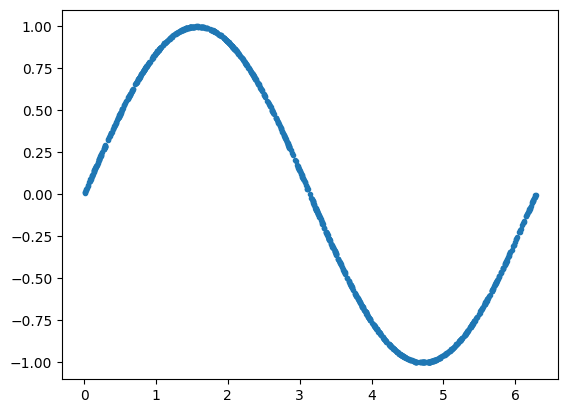

In [5]:
# visualise the data
plt.plot(train_data[:,0], train_data[:,1],".")

In [6]:
# Creating data loader for batch_wise training
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size)
train_loader

In [7]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2,256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64,1),
        nn.Sigmoid(),
    )
  # Sequential
  def forward(self,x):
    output = self.model(x)
    return output

In [8]:
class Generator(nn.Module):
  def __init__(self):
     super().__init__()
     self.model = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,2)
     )
  def forward(self,x):
    output = self.model(x)
    return output

In [9]:
discriminator = Discriminator()
generator = Generator()

In [10]:
# setting parameters for training
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()  #binary_cross_entropy_loss_function

In [11]:
# setting optimizer
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr = lr)
optimizer_g = torch.optim.Adam(generator.parameters(), lr = lr)

In [12]:
# Training GAN
for epoch in range(num_epochs):
  for n, (real_samples,_) in enumerate(train_loader):
    real_samples_labels = torch.ones((batch_size,1))
    latent_space_samples = torch.randn((batch_size,2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size,1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training Discriminator
    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_d.step()

    # generate random noise for training generator
    latent_space_samples = torch.randn((batch_size,2))

    # Training Generator
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
    loss_generator.backward()
    optimizer_g.step()

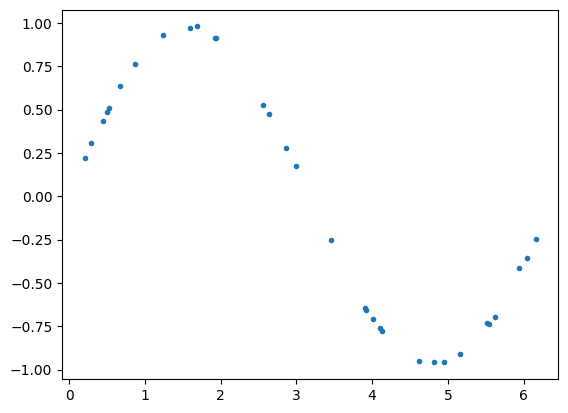

In [13]:
# Generating fake images
latent_space__samples = torch.randn(100,2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:,0],
         generated_samples[:,1],".")